In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"D:\ALL\ai/SVM_Data.csv")

In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


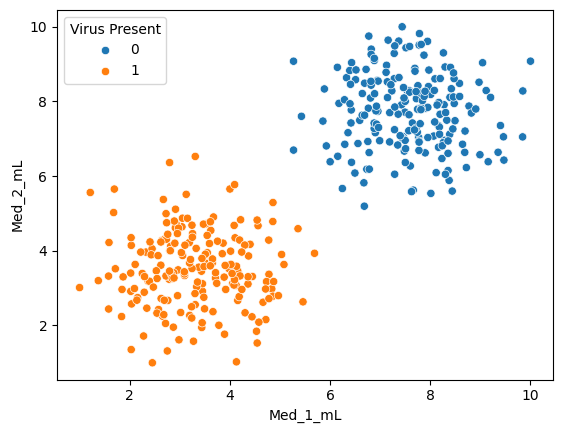

In [6]:
sns.scatterplot(data=df,x="Med_1_mL",y="Med_2_mL",hue="Virus Present")
plt.show()

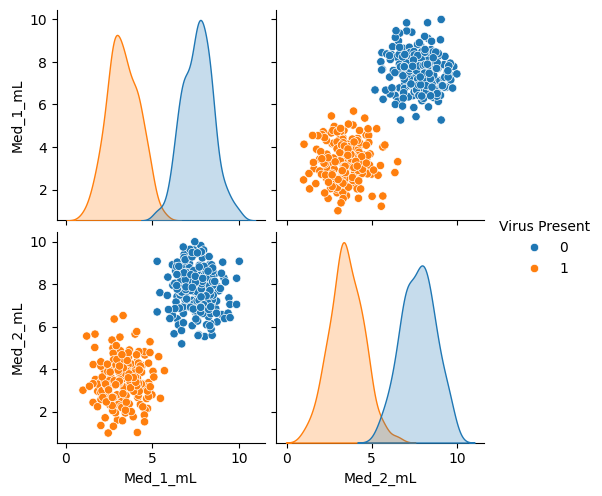

In [7]:
sns.pairplot(df,hue="Virus Present")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [9]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


In [10]:
df.duplicated().sum()

np.int64(0)

<Axes: >

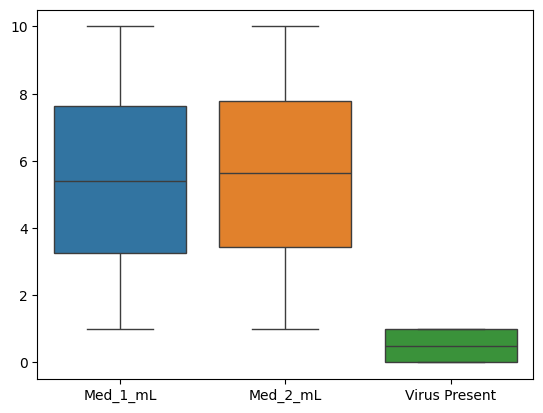

In [11]:
sns.boxplot(df)

In [12]:
df["Virus Present"].value_counts()

Virus Present
0    200
1    200
Name: count, dtype: int64

In [13]:
x=df.drop(columns=["Virus Present"])
y=df["Virus Present"]

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=00.2,shuffle=True,stratify=y)

In [15]:
xtrain.shape,xtest.shape

((320, 2), (80, 2))

In [29]:
#SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model= SVC(kernel="linear",C=0.01)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)


1.0

In [30]:
from svm_margin_plot import plot_svm_boundary


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


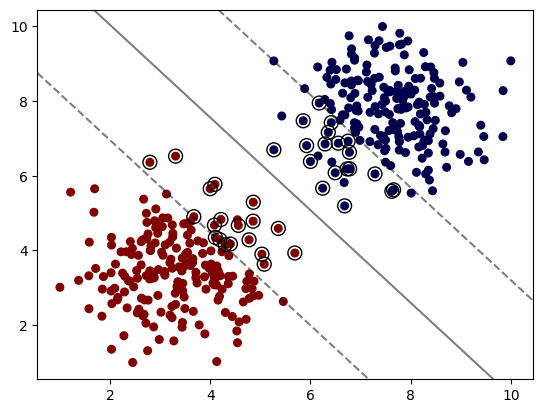

In [31]:
plot_svm_boundary(model,x,y)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


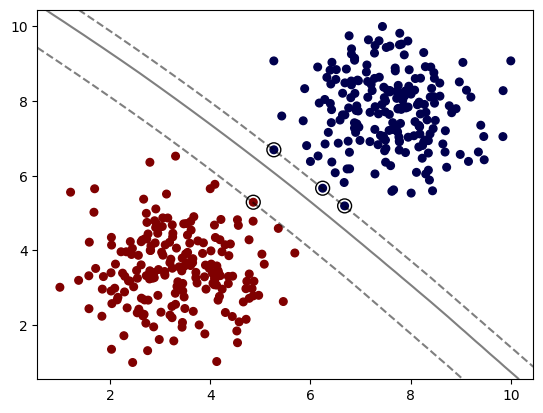

In [33]:
#SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model= SVC(kernel="poly",degree=10,C=1)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)
plot_svm_boundary(model,x,y)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


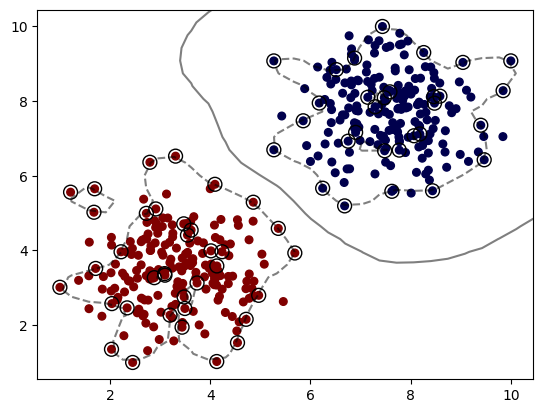

In [34]:
#SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model= SVC(kernel="rbf",gamma=1,C=1)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)
plot_svm_boundary(model,x,y)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


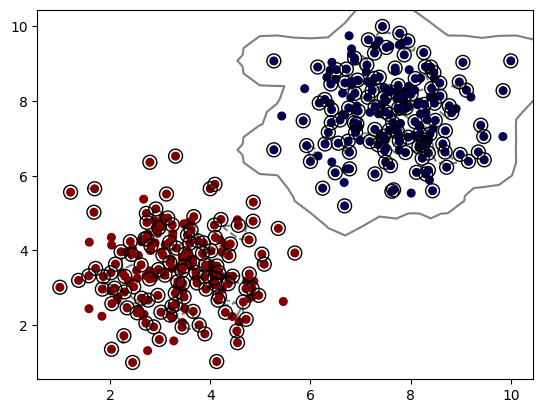

In [35]:
#SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model= SVC(kernel="rbf",gamma=10,C=1)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)
plot_svm_boundary(model,x,y)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


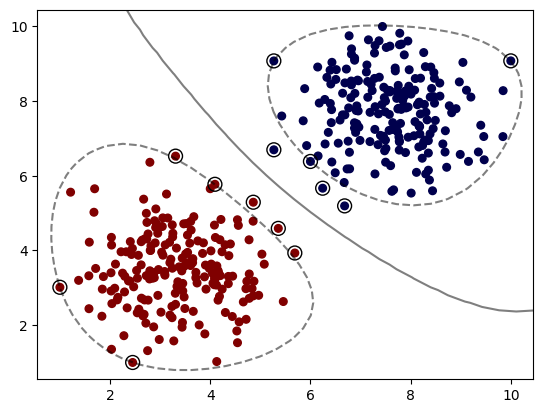

In [37]:
#SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model= SVC(kernel="rbf",gamma=0.1,C=1)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)
plot_svm_boundary(model,x,y)

In [46]:
from sklearn.model_selection import GridSearchCV

param={
    "kernel":["linear","poly","rbf"],
    "gamma":[0.001,0.01,0.1,1],
    "C":[0.001,0.01,0.1,1],
    "degree":[3,4,5,7]
}

In [47]:
grid=GridSearchCV(model,param)

In [48]:
grid.fit(xtrain,ytrain)

,estimator,"SVC(C=0.01, g...rnel='linear')"
,param_grid,"{'C': [0.001, 0.01, ...], 'degree': [3, 4, ...], 'gamma': [0.001, 0.01, ...], 'kernel': ['linear', 'poly', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.001


In [49]:
grid.best_estimator_

,C,0.001
,kernel,'linear'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


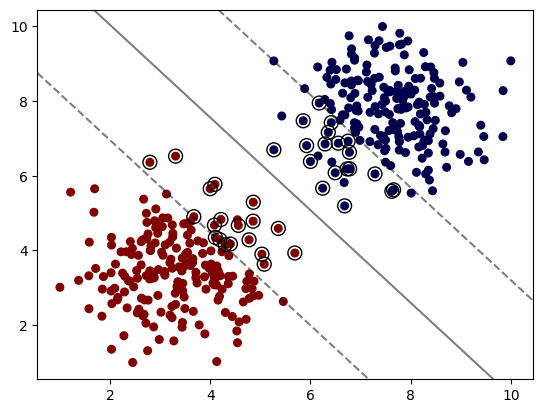

In [42]:
model=SVC(C=0.01,gamma=0.01,kernel="linear")
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)
plot_svm_boundary(model,x,y)

In [44]:
grid.best_params_

{'C': 0.001, 'degree': 3, 'gamma': 0.001, 'kernel': 'linear'}

In [45]:
grid.best_score_

np.float64(1.0)

In [1]:
import time